[*********************100%***********************]  1 of 1 completed


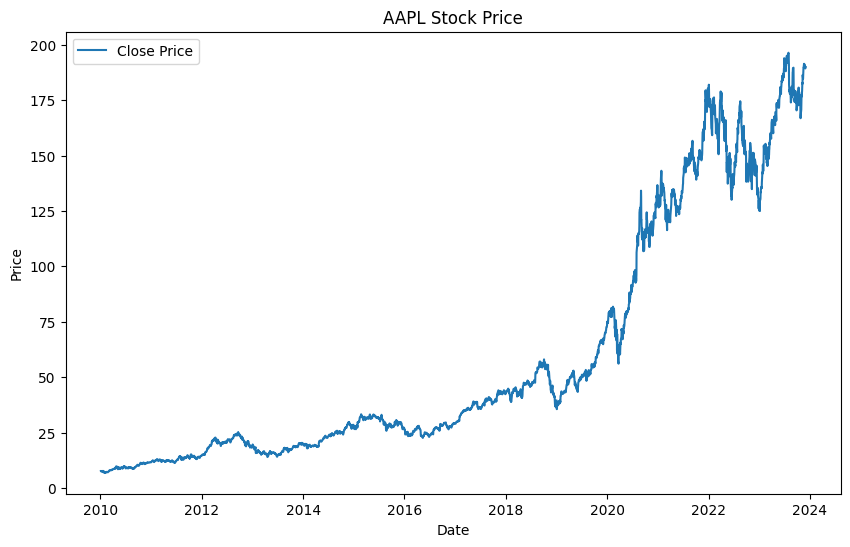

(2753, 60, 1) (689, 60, 1) (2753,) (689,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.0088 - val_loss: 6.6668e-04
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 5.4163e-04 - val_loss: 0.0013
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 5.2946e-04 - val_loss: 0.0014
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 4.5417e-04 - val_loss: 9.8953e-04
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 3.9465e-04 - val_loss: 0.0053
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 4.8692e-04 - val_loss: 0.0017
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 3.8373e-04 - val_loss: 4.5679e-04
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 3.1313e-04 - val_loss: 4.0566e-04
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 2.7591e-04 - val_loss: 5.2567e-04
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 3.8616e-04 - val_loss: 0.0017


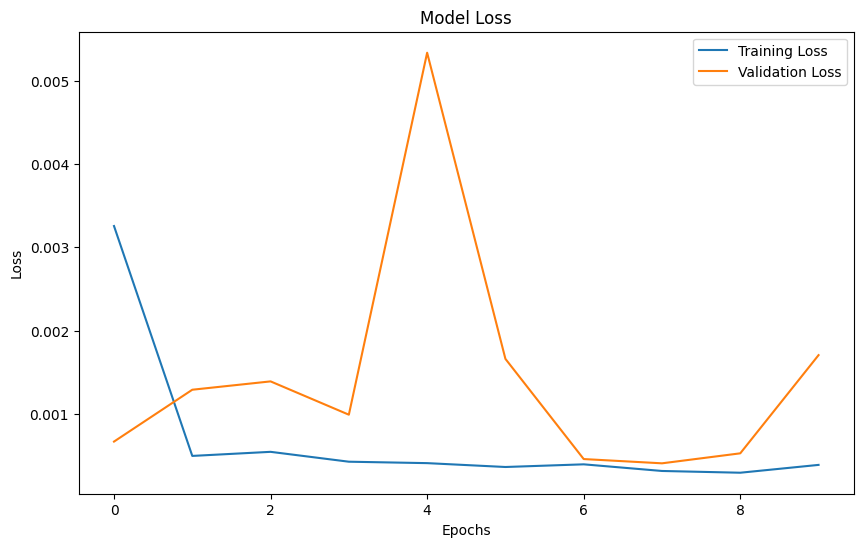

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


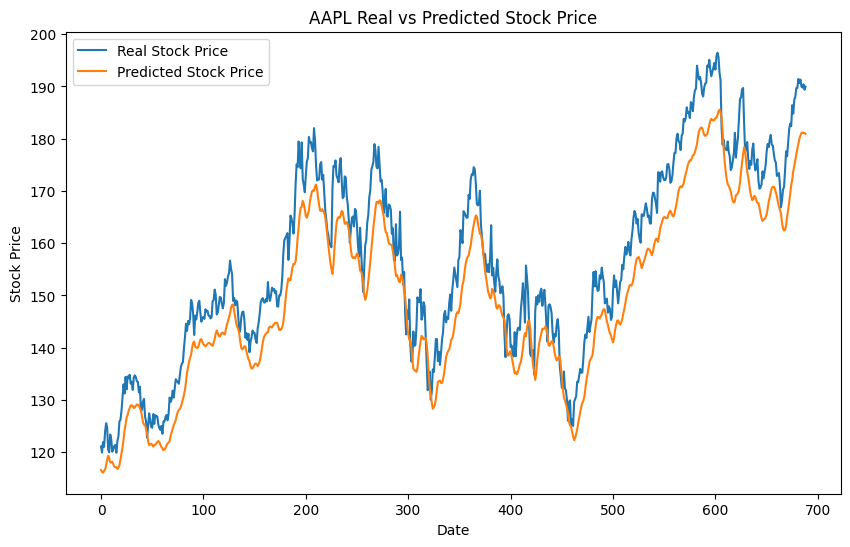

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted next day's stock price: 180.83738708496094


In [9]:
#9th
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define the ticker and date range
ticker = 'AAPL'  # Example ticker, you can change this
start_date = '2010-01-01'
end_date = '2023-12-01'

# Download historical stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Use 'Close' price for prediction
data = data[['Close']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Plotting the closing prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Function to create sequences of data for training
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create dataset with time step of 60
X, y = create_dataset(scaled_data, time_step=60)

# Reshape data for GRU input: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Building the GRU model
model = Sequential()

# Add GRU layers
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))  # Predicting one value (next day stock price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the stock price on the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform the predictions and the real stock prices to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot real vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_real, label='Real Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.title(f'{ticker} Real vs Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Predict the next day's stock price
input_data = scaled_data[-60:].reshape(1, -1)
input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)

predicted_next_price = model.predict(input_data)
predicted_next_price = scaler.inverse_transform(predicted_next_price)
print(f"Predicted next day's stock price: {predicted_next_price[0][0]}")